In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
beer = pd.DataFrame({'beer' :[45.3, 59.3, 40.4, 38.0, 37.0, 40.9, 60.2, 63.3, 51.1, 44.9, 47.0, 53.2,
                              43.5, 53.2, 37.4, 59.9, 41.5, 75.1, 55.6, 57.2, 46.5, 35.8, 51.9, 38.2,
                              66.0, 55.3, 55.3, 43.3, 70.5, 38.8],
                     'temperature' : [20.5, 25.0, 10.0, 26.9, 15.8, 4.2, 13.5, 26.0, 23.3, 8.5, 26.2, 19.1,
                                      24.3, 23.3, 8.4, 23.5, 13.9, 35.5, 27.2, 20.5, 10.2, 20.5, 21.6, 7.9,
                                      42.2, 23.9, 36.9, 8.9, 36.4, 6.4]})

In [3]:
lm_model = smf.ols(formula='beer~temperature', data=beer).fit()
resid = lm_model.resid

### 5.1.15 Q-Q Plot
- Quantile - Quantile Plot $\Rightarrow$ 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것\
- 이론상의 분위점과 실제 데이터의 분위점을 구해서 그 둘을 비교하는 것으로 잔차가 정규분포에 근접하는지 여부를 시각적으로 판단\
- Q-Q Plot 은 statsmodels.api 의 qqplot 함수를 사용해서 그릴 수 있다.\
- line = 's' $\rightarrow$ 잔차가 정규분포를 따르면 이 선상에 위치한다는 기준을 표시


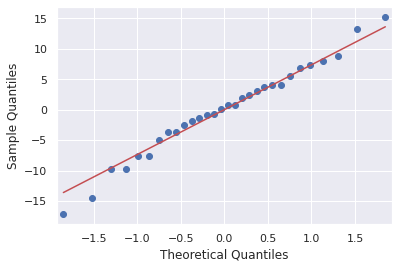

In [4]:
fig = sm.qqplot(resid, line='s');

- Q-Q plot 직접만들기

In [5]:
# 1. 데이터를 순서대로 졍렬 (세로축에 쓸 데이터)
resid_sort = resid.sort_values()

In [6]:
# 2-1. 가로축에 사용할 이론상 분위점 만들기
# sample size = 30
# 가장 작은 데이터는 1/31로 계산한다. (1부터 시작한다)
# 30개의 데이터를 모두 계산한다. (결과 이론상의 누적확률이 됨)
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.03225806, 0.06451613, 0.09677419, 0.12903226, 0.16129032,
       0.19354839, 0.22580645, 0.25806452, 0.29032258, 0.32258065,
       0.35483871, 0.38709677, 0.41935484, 0.4516129 , 0.48387097,
       0.51612903, 0.5483871 , 0.58064516, 0.61290323, 0.64516129,
       0.67741935, 0.70967742, 0.74193548, 0.77419355, 0.80645161,
       0.83870968, 0.87096774, 0.90322581, 0.93548387, 0.96774194])

In [7]:
# 2-2. Percent point function 이론상 분위점의 정규분포의 퍼센트포인트
ppf = sp.stats.norm.ppf(cdf)
ppf

array([-1.84859629, -1.51792916, -1.30015343, -1.13097761, -0.98916863,
       -0.86489436, -0.75272879, -0.64932391, -0.55244258, -0.46049454,
       -0.37228936, -0.28689392, -0.20354423, -0.12158738, -0.04044051,
        0.04044051,  0.12158738,  0.20354423,  0.28689392,  0.37228936,
        0.46049454,  0.55244258,  0.64932391,  0.75272879,  0.86489436,
        0.98916863,  1.13097761,  1.30015343,  1.51792916,  1.84859629])

가로축에 사용할 ppd 와 세로축에 사용할 resid_sort 를 만들었다.\
수작업으로 Q-Q plot을 만들 수 있다.

### 

In [8]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.11e-05
Time:                        15:00:06   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Prob(Omnibus), Prob(JB): 는 잔차의 정규성에 대한 검정 결과
 - 귀무가설: 잔차가 정규분포를 따른다.
 - 대립가설: 잔차가 정규분포를 따르지 않는다.
- **p값이 0.05보다 크다고해서 정규분포라고 주장할 수 없다.**
- 정규분포와 다른지 여부를 판단할 때 *Skew(왜도)*나 *Kurtosis(첨도)*라는 지표를 사용한다.
- **왜도** 는 히스토그램의 좌우비대칭 방향과 그 정도를 측정하는 지표이다.
- **왜도** 는 다음과 같이 계산할 수 있다. ($E()$ 는 기댓값을 받는 함수, $x$ 는 확률변수(이 경우 잔차), $\mu$ 는 $x$ 의 평균, $\sigma$ 는 $x$ 의 표본표준편차)\
#### $$ Skew = E \left( \frac{(x-\mu)^{3}}{\sigma^{3}} \right)$$
- **첨도** 는 히스토그램 중심부의 뾰족함을 측정하는 지표이다. (값이 클수록 가운데 부분이 뾰족해진다.)
#### $$ Kurtosis = E \left( \frac{(x-\mu)^{4}}{\sigma^{4}} \right)$$
- Durbin-Watson: 잔차의 자기상관을 체크하는 지표이다. (2전후라면 문제없다고 판단 **시계열 데이터** 대상으로 분석하는 경우 반드시 확인해야함)

## 5.2 ANOVA (Analysis of variance) 분산분석
### 5.2.2 분산분석이 필요한 시기
**분산분석**은 평균값의 차이를 검정하는 방법이다.\
3개 이상의 수준 간의 평균값에 차이가 있는지 검정할 때쓰는 분석이다.\
2개 수준간의 평균값의 차이를 검정할때는 t-test 를 사용한다.

*분산분석은 모집단이 정규분포를 따르는 데이터에 대해서만 적용할 수 있다. 또한 수준 사이의 분산값이 다르지 않다는 조건도 충족해야한다.*

### 5.2.3 검정의 다중성
검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제를 **검정의 다중성** 이라고 부른다.\
유의수준 0.05에서 검정을 2회 연속 했다, 이때 어느 한쪽의 검정에 대해서라도 귀무가설을 기각할 수 있다면 대립가설을 채택한다는 규칙으로 검정을 시행했다. 그러면 제 1종 오류를 저지를 확률은 1-(0.95$\times$0.95)=0.0975가 되어 10%에 가까워진다. 이것은 검정을 반복하면 귀무가설이 기각되기 쉬워지고 제 1종 오류를 저지를 확률이 높아진다.

분산분석을 하게 되면 개별 카테고리를 보는 것이 아니라 카테고리에따라 다른지 어떤지를 한 번의 검정으로 판단할 수 있게 된다.

### 5.2.4 분산분석의 직감적 사고방식: $F$비
분산분석의 귀무가설과 대립가설
- $H_{0}:$ 수준간의 평균값에 차이가 없다.
- $H_{1}:$ 수준간의 평균값에 차이가 있다.
이란 날씨, 물고기 종류 등과 같은 카테고리형 변수를 가르킨다.\
분산분석에서는 데이터의 변동을 오차와 효과로 분리한다. 그리고 **$F$비** 라 부르는 통계량을 계산한다.\
$F$비 $= \frac{효과의 분산 크기}{오차의 분산 크기}$
예제에서 효과는 날씨에 따른 매상의 변동이다. 오차는 날씨라는 변수를 이용해서 설명할 수 없는 맥주 매상의 변동이다.\
영향의 크기는 분산을 이용해서 정량화한다. 날씨에 따른 매상 변동은 '날씨가 변함에 따른 데이터의 흩어짐 크기'로 표현됩니다.\
오차영향의 크기도 잔차의 분산을 계산함으로써 구할 수 있다.\
분산의 비율을 취한 통계량으로 검정을 시행하기 때문에 분산분석이라고 불린다.\

$F$비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단할 수 있다.\
모집단분포가 등분산 정규분포일 때의 $F$비의 표본분포는 $\rightarrow$ $F$분포라고 부른다.
$F$분포의 누적분포함수를 사용해서 $p-value$를 계산, 0.05가 되면 귀무가설 기각한다는 흐름은 $t-test$와 같다.

### 5.2.5 유의미한 차이가 있을 때와 없을 때의 violin plot
그래프를 보는 것만으로도 유의미한 차이를 판정할 수 있을 것 같지만, *정량적인 기준을 이용해서 판단을 하는 경우*에는 **분산분석**이 필요하다.

### 5.2.6 분산분석의 직감적 사고방식: 오차 및 효과의 분리
### 5.2.7 군간변동과 군내변동
- 효과의 크기를 **군간변동**
- 오차의 크기를 **군내변동**
- 분산분석에서는 데이터의 분산을 군간변동과 군내변동 2개로 나눈 뒤 그 비율을 취한 것을 통계량으로 사용하여 검정을 시행한다.

### 5.2.9 데이터 작성과 표시
작은 데이터로 계산 결과 쉽게 보기

In [9]:
# 샘플 데이터 데이터프레임
weather_beer = pd.DataFrame({"beer"   : [6,8,2,4,10,12],
                             "weather": ["cloudy","cloudy", "rainy","rainy", "sunny","sunny"]})
weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


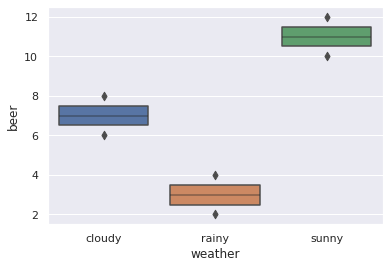

In [10]:
# 샘플사이즈가 작기 때문에 boxplot으로 그린다.
sns.boxenplot(x='weather', y='beer', data=weather_beer);

In [11]:
# 날씨별 평균
weather_beer.groupby('weather').mean()

,beer
weather,
cloudy,7.0
rainy,3.0
sunny,11.0


### 5.2.10 분산분석(1): 군간 제곱과 군내 제곱 계산
일원배치 분산분석(One-Way Anova) 수작업으로 구현

In [12]:
# 효과의 크기, 즉 군간변동을 계산한다.
# 날씨에 의한 영향
effect = [7, 7, 3, 3, 11, 11]

In [13]:
# effect 의 흩어진 정도를 구함으로 군간변동을 구할 수 있다.
# 군간 제곱합
mu_effect = np.mean(effect)
squares_model = np.sum((effect-mu_effect)**2)
squares_model

64.0

In [14]:
# 오차는 원래 데이터에서 효과를 빼는 것으로 계산할 수 있다.
resid = weather_beer.beer-effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [15]:
# 군내 편차제곱합을 구한다. !!주의!! 오차의 평균값은 0
squares_resid = np.sum(resid**2)
squares_resid

6

### 5.2.11 분산분석(2): 군간 분산과 군내 분산 계산
표본분산을 계산할때와 마찬가지로 분산분석에서도 군간, 군내 분산을 계산할 때의 분모는 자유도라 불리는 값으로 나누어야 한다.\
- **군간변동**의 자유도는 수준의 종류 수에 따라 좌우된다.\
날씨는 흐림,비,맑음의 3가지 수준이다. 2을 빼면 군간변동의 자유도는 2가 된다.\
- **군내변동**의 자유도는 샘플사이즈와 수준의 종류 수로 좌우된다.\
샘플 사이즈가 6, 수준이 3이므로 6-3=*3*이 군내변동의 *자유도*가 된다. 


In [16]:
# 군간변동의 자유도
df_model = 2
# 군내변동의 자유도
df_resid = 3

In [17]:
# 군간 평균제곱(분산)
variance_model = squares_model / df_model
variance_model

32.0

In [18]:
# 군내 평균제곱(분산)
variance_resid = squares_resid / df_resid
variance_resid

2.0

### 5.2.12 분산분석(3): $p-value$ 계산
마지막으로 $F$비와 $p-value$를 계산한다.\
$F$비는 군간 분산과 군내 분산의 비로 계산할 수 있다.

In [19]:
f_ratio = variance_model / variance_resid
f_ratio

16.0

$p-value$는 $F$분포의 누적분포함수에서 계산할 수 있다.\
sp.stats.f.cdf 함수를 사용한다.\
파라미터로 $F$비와 2개의 자유도를 넘긴다.

In [20]:
1 - sp.stats.f.cdf(x=f_ratio, dfn=2, dfd=3)

0.02509457330439091

### 5.2.13 독립변수가 카테고리형인 일반선형모델
날씨에서 매상을 예측하는 일반선형모델은
##### 맥주 매상~$\mathcal{N}(\beta_{0}+\beta_{1}\times비+\beta_{2}\times맑음,\sigma^{2})$
비도 아니고 맑음도 아닌 경우 절편만 남으므로 그게 흐림의 계수라고 해석할 수 있다.

### 5.2.14 더미변수
카테고리형 변수를 넣을 때 사용하는 것 (비일때 1 그 외는 0인 변수)

### 5.2.15 statsmodels를 이용한 분산분석

In [21]:
anova_model = smf.ols('beer~weather', data=weather_beer).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


### 5.3.16 분산분석표
sm.stats.anova_lm 함수의 결과로 출력된 표의 형식을 분산분석표라 한다.\
군간과 군내 제곱합 sum_sq, 자유도, $F$비, $p-value$ 가 정리되어있다.

### 5.3.17 모델의 계수 해석

In [22]:
# 추정된 모델의 계수 표시
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

##### 맥주 매상~$\mathcal{N}(\beta_{0}+\beta_{1}\times비+\beta_{2}\times맑음,\sigma^{2})$
Intercept $\rightarrow \beta_{0}$\
- 흐린날 평균은 7
- 비오는 날에는 7 - 4 + 0 = 3
- 맑은 날에는 7 + 0 + 4 = 11 의 기댓값이 나온다.

### 5.2.18 모델을 사용해서 오차와 효과 분리하기

In [23]:
# 추정된 모델의 계수를 이용한 훈련 데이터의 결과
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [24]:
# 적용된 결괏값과 실제 데이터의 차이가 잔차이다.
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

통계모델을 적용한 값과 잔차를 이용함으로써 분산분석이라는 검정을 수행할 수 있다는 것을 알 수 있다.

### 5.2.19 회귀모델의 분산분석
- 분산분석이라는 검정방법은 일반선형모델에서 일반적으로 사용 가능하다.\
- 독립변수가 연속형 데이터여도 변함이 없다.

In [25]:
# EX6)의 데이터를 사용한다.
beer = pd.DataFrame({'beer' :[45.3, 59.3, 40.4, 38.0, 37.0, 40.9, 60.2, 63.3,
                              51.1, 44.9, 47.0, 53.2, 43.5, 53.2, 37.4, 59.9,
                              41.5, 75.1, 55.6, 57.2, 46.5, 35.8, 51.9, 38.2,
                              66.0, 55.3, 55.3, 43.3, 70.5, 38.8],
                     'temperature' : [20.5, 25.0, 10.0, 26.9, 15.8, 4.2, 13.5, 26.0,
                                      23.3, 8.5, 26.2, 19.1, 24.3, 23.3, 8.4, 23.5,
                                      13.9, 35.5, 27.2, 20.5, 10.2, 20.5, 21.6, 7.9,
                                      42.2, 23.9, 36.9, 8.9, 36.4, 6.4]})
lm_model = smf.ols(formula='beer~temperature', data=beer).fit()

- 독립변수가 카테고리형 변수라해도 모델의 적용값과 잔차를 사용해서 $F$비를 계산 할수 있다.
- 독립변수가 연속형인경우
 - 군간변동의 자유도 $\rightarrow$ 모델의 자유도
 - 군내변동의 자유도 $\rightarrow$ 잔차의 자유도
- **모델의 자유도**는 추정된 파라미터 수에서 1을 뺀것
- **단순회귀모델의 계수**는 절편과 기울기 2개 뿐이므로 **자유도**는 1이 된다.
- **잔차의 자유도**는 샘플사이즈에서 추정된 파라미터 수를 뺀 것이다.

In [26]:
# 모델의 자유도
df_lm_model = 1
# 잔차의 자유도
df_lm_resid = 28

$F$ 비 계산

In [27]:
# 모델을 적용한 값
lm_effect = lm_model.fittedvalues
# 잔차
lm_resid = lm_model.resid
# 기온의 효과의 크기
mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect-mu)**2)
variance_lm_model = squares_lm_model / df_lm_model
# 잔차의 크기
squares_lm_resid = np.sum((lm_resid)**2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F비
f_values_lm = variance_lm_model / variance_lm_resid
f_values_lm

28.446983688504634

In [28]:
sm.stats.anova_lm(lm_model, typ=2)

,sum_sq,df,F,PR(>F)
temperature,1651.532489,1.0,28.446984,0.000011
Residual,1625.582178,28.0,NaN,NaN


In [29]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.11e-05
Time:                        15:00:08   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""